In [11]:
%pip install nibabel
%pip install tensorflow
%pip install keras


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [55]:
%pip install numpy
%pip install tifffile
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import random
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
TRAIN_DATASET_PATH = 'C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

In [59]:
test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(test_image_flair.max())

1854.603271484375


In [60]:
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [61]:
print(test_image_flair.max())

1.0


In [62]:
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

In [63]:
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

In [64]:
print(np.unique(test_mask))
test_mask[test_mask==4] = 3 
print(np.unique(test_mask))

[0 1 2 4]
[0 1 2 3]


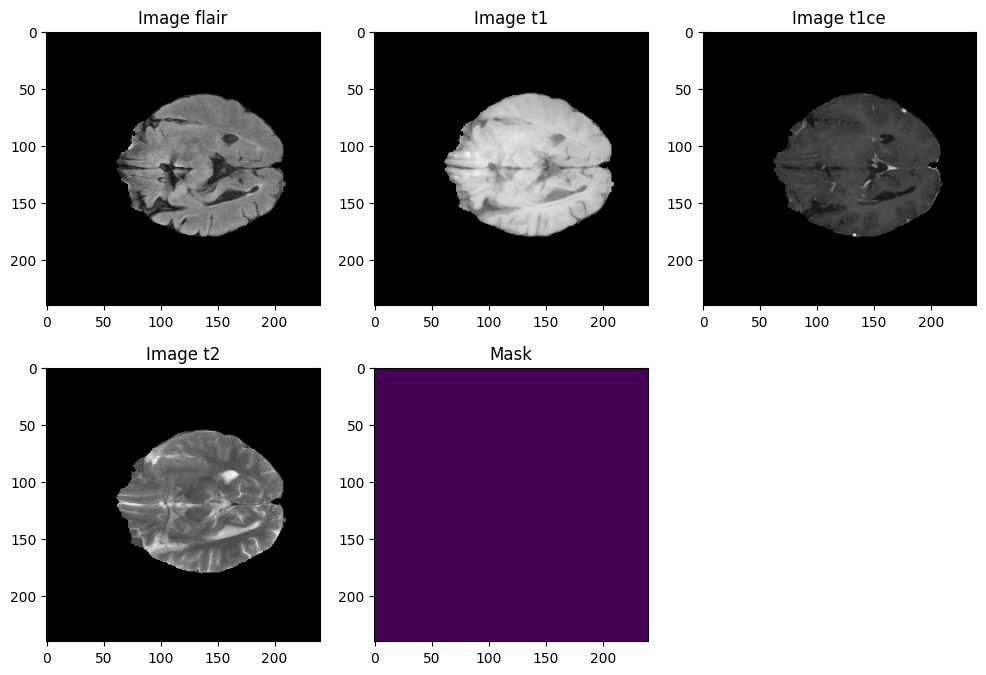

In [65]:
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [66]:
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

combined_x=combined_x[56:184, 56:184, 13:141]
test_mask = test_mask[56:184, 56:184, 13:141]

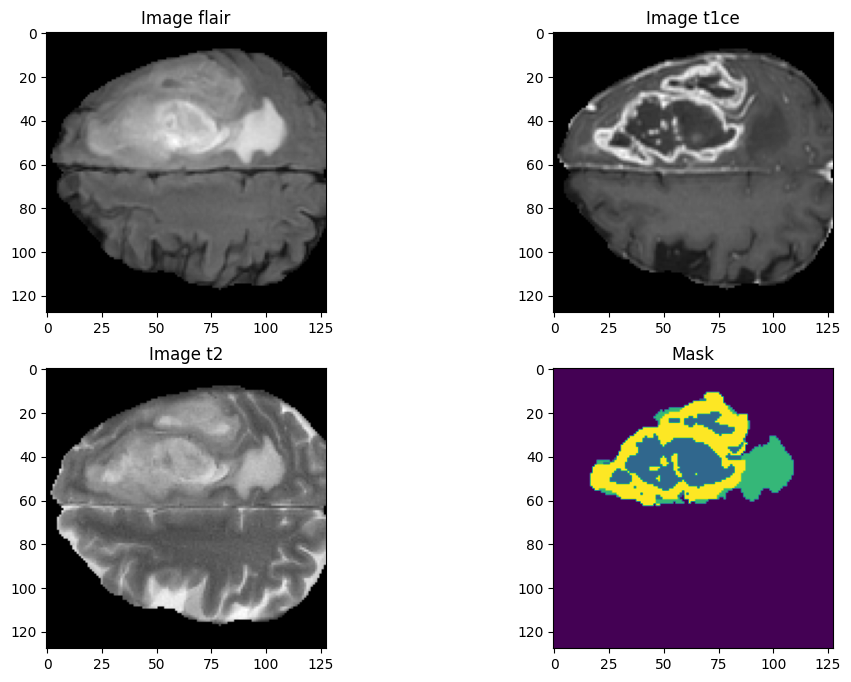

In [67]:
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [68]:
test_mask = to_categorical(test_mask, num_classes=4)

In [69]:
test_mask.shape

(128, 128, 128, 4)

In [70]:
t2_list = sorted(glob.glob('C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_list = sorted(glob.glob('C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [71]:
len(flair_list)

369

In [72]:


for img in range(len(t2_list)):
    print("Now preparing image and masks number: ", img)
      
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  
    
    
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01: 
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_3_channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_3_channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")   

Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  19
Save Me
Now p

In [73]:
pip install split-folders


Note: you may need to restart the kernel to use updated packages.


In [74]:
import splitfolders

input_folder = 'C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_3_channels/'
output_folder = 'C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None)

In [22]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [20]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)


    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X.astype(np.float32),Y.astype(np.float32))   

            batch_start += batch_size   
            batch_end += batch_size

In [78]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


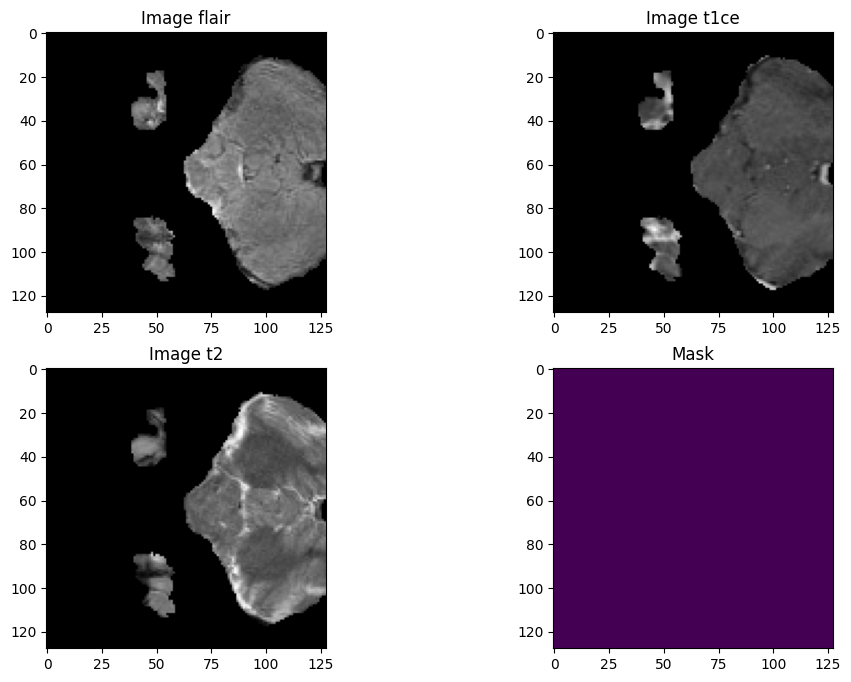

In [23]:
train_image_path = "C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/train/images/"
train_msk_path = "C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/train/masks/"

train_image_list=os.listdir(train_image_path)
train_msk_list = os.listdir(train_msk_path)

batch_size = 2

train_img_datagen = imageLoader(train_image_path, train_image_list, 
                                train_msk_path, train_msk_list, batch_size)

img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [80]:
img_samples = load_img(train_image_path, train_image_list[:5])
print(f"Loaded images shape: {img_samples.shape}")


Loaded images shape: (5, 128, 128, 128, 3)


In [26]:
val_image_path = "C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/val/images/"
val_msk_path = "C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/val/masks//"

val_image_list=os.listdir(val_image_path)
val_msk_list = os.listdir(val_msk_path)

val_img_datagen = imageLoader(val_image_path, val_image_list, 
                                val_msk_path, val_msk_list, batch_size)

In [82]:
msk_samples = load_img(train_msk_path, train_msk_list[:5])
print(f"Loaded masks shape: {msk_samples.shape}")


Loaded masks shape: (5, 128, 128, 128, 4)


In [83]:
train_batch = next(train_img_datagen)
print(f"Train batch images shape: {train_batch[0].shape}")
print(f"Train batch masks shape: {train_batch[1].shape}")


Train batch images shape: (2, 128, 128, 128, 3)
Train batch masks shape: (2, 128, 128, 128, 4)


In [84]:
print(f"Image min: {train_batch[0].min()}, max: {train_batch[0].max()}")
print(f"Mask min: {train_batch[1].min()}, max: {train_batch[1].max()}")


Image min: 0.0, max: 1.0
Mask min: 0.0, max: 1.0


In [85]:
for i in range(5):
    train_batch = next(train_img_datagen)
    print(f"Batch {i+1} - Images shape: {train_batch[0].shape}, Masks shape: {train_batch[1].shape}")


Batch 1 - Images shape: (2, 128, 128, 128, 3), Masks shape: (2, 128, 128, 128, 4)
Batch 2 - Images shape: (2, 128, 128, 128, 3), Masks shape: (2, 128, 128, 128, 4)
Batch 3 - Images shape: (2, 128, 128, 128, 3), Masks shape: (2, 128, 128, 128, 4)
Batch 4 - Images shape: (2, 128, 128, 128, 3), Masks shape: (2, 128, 128, 128, 4)
Batch 5 - Images shape: (2, 128, 128, 128, 3), Masks shape: (2, 128, 128, 128, 4)


In [86]:
train_batch = next(train_img_datagen)
print(f"Images batch shape: {train_batch[0].shape}, Masks batch shape: {train_batch[1].shape}")

assert train_batch[0].shape[1:] == (128, 128, 128, 3), "Image shape mismatch!"
assert train_batch[1].shape[1:] == (128, 128, 128, 4), "Mask shape mismatch!"


Images batch shape: (2, 128, 128, 128, 3), Masks batch shape: (2, 128, 128, 128, 4)


In [9]:
pip install --upgrade tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [5]:
import segmentation_models_3D as sm

Segmentation Models: using `keras` framework.


In [13]:
import keras
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU

In [92]:
%pip install tensorflow

  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models-3d 1.1.1 requires keras==3.3.3, but you have keras 3.7.0 which is incompatible.


In [95]:
%pip install tensorflow --upgrade

Note: you may need to restart the kernel to use updated packages.


In [14]:
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

In [15]:
#Attention Unet

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D, Conv3DTranspose, MaxPooling3D, Dropout, concatenate, Activation, Add, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

def attention_block(x, g, inter_channel):
    theta_x = Conv3D(inter_channel, kernel_size=1, strides=1, padding='same')(x)
    phi_g = Conv3D(inter_channel, kernel_size=1, strides=1, padding='same')(g)
    f = Add()([theta_x, phi_g])
    f = Activation('relu')(f)
    psi = Conv3D(1, kernel_size=1, strides=1, padding='same')(f)
    psi = Activation('sigmoid')(psi)
    x_attention = Multiply()([x, psi])
    return x_attention

# Modified U-Net with Attention Mechanism
def attention_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    s = inputs

    # Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c5)

    # Expansive path with attention
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    a4 = attention_block(c4, u6, 128)
    u6 = concatenate([u6, a4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    a3 = attention_block(c3, u7, 64)
    u7 = concatenate([u7, a3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    a2 = attention_block(c2, u8, 32)
    u8 = concatenate([u8, a2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    a1 = attention_block(c1, u9, 16)
    u9 = concatenate([u9, a1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.summary()

    return model


input_shape = (128, 128, 128, 3)
num_classes = 4

model4 = attention_unet_model(128,128,128,3,4)
model4.compile(optimizer= tf.keras.optimizers.Adam(0.00001), loss= total_loss, metrics= metrics)

print(model4.input_shape)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_31 (Conv3D)  │ (None, 128, 128,  │      1,312 │ input_layer_1[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128, 128,  │          0 │ conv3d_31[0][0]   │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_32 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_9[0][0]   │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_4     │ (None, 64, 64,    │          0 │ conv3d_32[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_33 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_4[… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64, 64,    │          0 │ conv3d_33[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_34 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_10[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_5     │ (None, 32, 32,    │          0 │ conv3d_34[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_35 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_5[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32, 32,    │          0 │ conv3d_35[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_36 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_11[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_6     │ (None, 16, 16,    │          0 │ conv3d_36[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_37 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_6[… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 16, 16,    │          0 │ conv3d_37[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_38 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_12[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_7     │ (None, 8, 8, 8,   │          0 │ conv3d_38[0][0] 

 Total params: 5,690,072 (21.71 MB)

 Trainable params: 5,690,072 (21.71 MB)

 Non-trainable params: 0 (0.00 B)

(None, 128, 128, 128, 3)


In [96]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = "brats_3d_attention_unet_best_model.hdf5"

In [98]:
!pip install --upgrade mlxtend

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 8.7 MB/s eta 0:00:00
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [99]:
# Set up callbacks
callbacks = [
   ModelCheckpoint(
       filepath=checkpoint_path,  # Path to save the model
       monitor='val_loss',        # Monitor validation loss
       save_best_only=True,       # Save only the best model
       mode='min',                # Minimize the monitored value
       verbose=1
   ),
   EarlyStopping(
       monitor='val_loss',        # Monitor validation loss
       patience=5,                # Stop training after 5 epochs without improvement
       mode='min',                # Minimize the monitored value
       verbose=1
   )
]

AttributeError: `np.Inf` was removed in the NumPy 2.0 release. Use `np.inf` instead.

In [ ]:
# Train the model with callbacks
history2 = model4.fit(
   train_img_datagen,
   steps_per_epoch=steps_per_epoch,
   epochs=30,
   verbose=1,
   validation_data=val_img_datagen,
   validation_steps=val_steps_per_epoch,
   callbacks=callbacks  # Add the callbacks here
)

In [ ]:
# Save the final model
model4.save('brats_3d_attention_unet_30epochs.hdf5')

In [ ]:
#Test if everything is working ok. 
input_shape = (128, 128, 128, 3)
num_classes = 4

# Build and compile the model
model4 = attention_unet_model(128,128,128,3,4)
model4.compile(optimizer= tf.keras.optimizers.Adam(0.00001), loss= total_loss, metrics= metrics)

# Summary of the model
print(model4.input_shape)

In [27]:
steps_per_epoch = len(train_image_list)//batch_size
val_steps_per_epoch = len(val_image_list)//batch_size

In [ ]:
history=model4.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=10,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

model4.save('brats_3d_attention_unet.hdf5')

In [ ]:
model4.save('brats_3d_attention_unet.hdf5')

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
iou_score_result = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1, len(iou_score_result) + 1)
plt.plot(epochs, iou_score_result, 'y', label='Training IoU')
plt.plot(epochs, val_iou, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model

my_model = load_model('C:/Users/deepa/Brain MRI Final Data/brats_3d_attention_unet.hdf5', 
                      compile=False)

In [ ]:
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_image_path, val_image_list, 
                                val_msk_path, val_msk_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

In [42]:
img_num = 100

test_img = np.load("C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

NameError: name 'my_model' is not defined

In [ ]:
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Define label-to-color mapping (example)
class_labels = {
    0: 'Background',
    1: 'Tumor Core',
    2: 'Edema',
    3: 'Enhancing Tumor'
}

# Define colors based on the colormap (e.g., 'jet')
color_map = plt.cm.jet(np.linspace(0, 1, len(class_labels)))

# Choose a valid slice index
n_slice = 55  # Replace with your desired slice index

# Visualization
plt.figure(figsize=(18, 6))

# 1. Display the MRI image
plt.subplot(131)
plt.title('MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')  # Grayscale MRI image
plt.axis('off')

# 2. Display the Ground Truth Mask
plt.subplot(132)
plt.title('Ground Truth')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')  # Grayscale MRI image
plt.imshow(test_mask_argmax[:, :, n_slice], cmap='jet', alpha=0.4)  # Ground truth mask overlay
plt.axis('off')

# 3. Display the Prediction Mask Overlaid on the MRI Image
plt.subplot(133)
plt.title('Prediction Overlaid on MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')  # Grayscale MRI image
plt.imshow(test_prediction_argmax[:, :, n_slice], cmap='jet', alpha=0.4)  # Prediction mask overlay
plt.axis('off')

# Add legend for the labels
legend_patches = [mpatches.Patch(color=color_map[i], label=f"{key}: {label}") 
                  for i, (key, label) in enumerate(class_labels.items())]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Labels")

plt.tight_layout()
plt.show()


In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Define label-to-color mapping (excluding background)
class_labels = {
    1: 'Tumor Core',
    2: 'Edema',
    3: 'Enhancing Tumor'
}

# Define colors based on the colormap (e.g., 'jet')
color_map = plt.cm.jet(np.linspace(0, 1, len(class_labels)))

# Choose a valid slice index
n_slice = 55  # Replace with your desired slice index

# Visualization
plt.figure(figsize=(18, 6))

# 1. Display the MRI image
plt.subplot(131)
plt.title('MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')  # Grayscale MRI image
plt.axis('off')

# 2. Display the Ground Truth Mask
plt.subplot(132)
plt.title('Ground Truth')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')  # Grayscale MRI image
ground_truth_mask = np.where(test_mask_argmax[:, :, n_slice] > 0, test_mask_argmax[:, :, n_slice], np.nan)
plt.imshow(ground_truth_mask, cmap='jet', alpha=0.5)  # Ground truth mask overlay
plt.axis('off')

# 3. Display the Prediction Mask Overlaid on the MRI Image
plt.subplot(133)
plt.title('Prediction Overlaid on MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray')  # Grayscale MRI image
prediction_mask = np.where(test_prediction_argmax[:, :, n_slice] > 0, test_prediction_argmax[:, :, n_slice], np.nan)
plt.imshow(prediction_mask, cmap='jet', alpha=0.5)  # Prediction mask overlay
plt.axis('off')

# Add legend for the labels (excluding background)
legend_patches = [mpatches.Patch(color=color_map[i], label=f"{key}: {label}") 
                  for i, (key, label) in enumerate(class_labels.items())]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Labels")

plt.tight_layout()
plt.show()


In [ ]:
history2=model4.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=30,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

model4.save('brats_3d_attention_unet_30epochs.hdf5')

In [12]:
model4 = attention_unet_model(128,128,128,3,4)
model4.compile(optimizer= tf.keras.optimizers.Adam(0.00001), loss= total_loss, metrics= metrics)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_62 (Conv3D)  │ (None, 128, 128,  │      1,312 │ input_layer_2[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 128, 128,  │          0 │ conv3d_62[0][0]   │
│ (Dropout)           │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_63 (Conv3D)  │ (None, 128, 128,  │      6,928 │ dropout_18[0][0]  │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_8     │ (None, 64, 64,    │          0 │ conv3d_63[0][0]   │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_64 (Conv3D)  │ (None, 64, 64,    │     13,856 │ max_pooling3d_8[… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64, 64,    │          0 │ conv3d_64[0][0]   │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_65 (Conv3D)  │ (None, 64, 64,    │     27,680 │ dropout_19[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_9     │ (None, 32, 32,    │          0 │ conv3d_65[0][0]   │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_66 (Conv3D)  │ (None, 32, 32,    │     55,360 │ max_pooling3d_9[… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 32, 32,    │          0 │ conv3d_66[0][0]   │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_67 (Conv3D)  │ (None, 32, 32,    │    110,656 │ dropout_20[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_10    │ (None, 16, 16,    │          0 │ conv3d_67[0][0]   │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_68 (Conv3D)  │ (None, 16, 16,    │    221,312 │ max_pooling3d_10… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 16, 16,    │          0 │ conv3d_68[0][0]   │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_69 (Conv3D)  │ (None, 16, 16,    │    442,496 │ dropout_21[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_11    │ (None, 8, 8, 8,   │          0 │ conv3d_69[0][0] 

 Total params: 5,690,072 (21.71 MB)

 Trainable params: 5,690,072 (21.71 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the path to save the best model
checkpoint_path = "brats_3d_attention_unet_best_model.keras"

# Set up callbacks
callbacks = [
   ModelCheckpoint(
       filepath=checkpoint_path,  # Path to save the model
       monitor='val_loss',        # Monitor validation loss
       save_best_only=True,       # Save only the best model
       mode='min',                # Minimize the monitored value
       verbose=1
   ),
   EarlyStopping(
       monitor='val_loss',        # Monitor validation loss
       patience=5,                # Stop training after 5 epochs without improvement
       mode='min',                # Minimize the monitored value
       verbose=1
   )
]

# Train the model with callbacks
history2 = model4.fit(
   train_img_datagen,
   steps_per_epoch=steps_per_epoch,
   epochs=30,
   verbose=1,
   validation_data=val_img_datagen,
   validation_steps=val_steps_per_epoch,
   callbacks=callbacks  # Add the callbacks here
)

# Save the final model
model4.save('brats_3d_attention_unet_30epochs.keras')

Epoch 1/30


c:\Users\deepa\Brain MRI Final Data\brats\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_138']
Received: inputs=Tensor(shape=(None, 128, 128, 128, 3))
  warnings.warn(msg)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5472 - iou_score: 0.0738 - loss: 0.9985
Epoch 1: val_loss improved from inf to 0.97725, saving model to brats_3d_attention_unet_best_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 647s 5s/step - accuracy: 0.5487 - iou_score: 0.0743 - loss: 0.9984 - val_accuracy: 0.9156 - val_iou_score: 0.0849 - val_loss: 0.9772
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9346 - iou_score: 0.2168 - loss: 0.9558
Epoch 2: val_loss improved from 0.97725 to 0.96744, saving model to brats_3d_attention_unet_best_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 619s 5s/step - accuracy: 0.9347 - iou_score: 0.2168 - loss: 0.9557 - val_accuracy: 0.8222 - val_iou_score: 0.1271 - val_loss: 0.9674
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9453 - iou_score: 0.2295 - loss: 0.9415
Epoch 3: val_loss improved from 0.96744 to 0.96406, saving model to brats_3d_attention_unet_best_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 620s 5s/step - accur

In [26]:
# Train the model with callbacks
history2 = model4.fit(
   train_img_datagen,
   steps_per_epoch=steps_per_epoch,
   epochs=15,
   verbose=1,
   validation_data=val_img_datagen,
   validation_steps=val_steps_per_epoch,
)

# Save the final model
model4.save('brats_3d_attention_unet_30epochs_new.keras')

Epoch 1/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 729s 6s/step - accuracy: 0.9600 - iou_score: 0.3866 - loss: 0.8893 - val_accuracy: 0.7280 - val_iou_score: 0.2644 - val_loss: 0.9505
Epoch 2/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 630s 5s/step - accuracy: 0.9599 - iou_score: 0.3986 - loss: 0.8875 - val_accuracy: 0.7424 - val_iou_score: 0.2747 - val_loss: 0.9475
Epoch 3/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 626s 5s/step - accuracy: 0.9608 - iou_score: 0.4112 - loss: 0.8849 - val_accuracy: 0.7158 - val_iou_score: 0.2652 - val_loss: 0.9537
Epoch 4/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 631s 5s/step - accuracy: 0.9615 - iou_score: 0.4213 - loss: 0.8827 - val_accuracy: 0.7038 - val_iou_score: 0.2595 - val_loss: 0.9568
Epoch 5/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 641s 5s/step - accuracy: 0.9620 - iou_score: 0.4289 - loss: 0.8807 - val_accuracy: 0.7223 - val_iou_score: 0.2662 - val_loss: 0.9532
Epoch 6/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 631s 5s/step - accuracy: 0.9629 - iou_score: 0.4387 - loss: 0.8783 - val_accuracy: 0.7159 - val

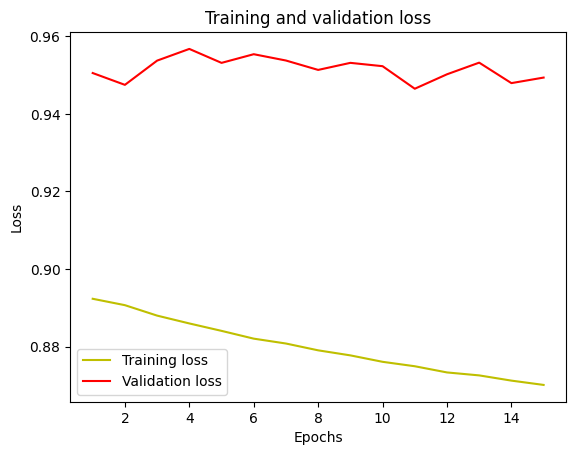

In [28]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

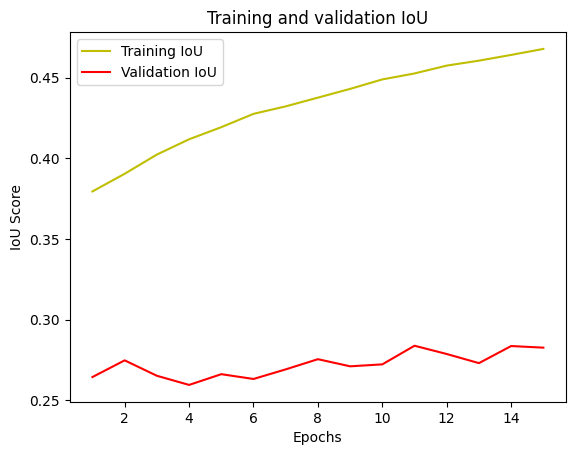

In [29]:
iou_score_result = history2.history['iou_score']
val_iou = history2.history['val_iou_score']
epochs = range(1, len(iou_score_result) + 1)
plt.plot(epochs, iou_score_result, 'y', label='Training IoU')
plt.plot(epochs, val_iou, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()
plt.show()

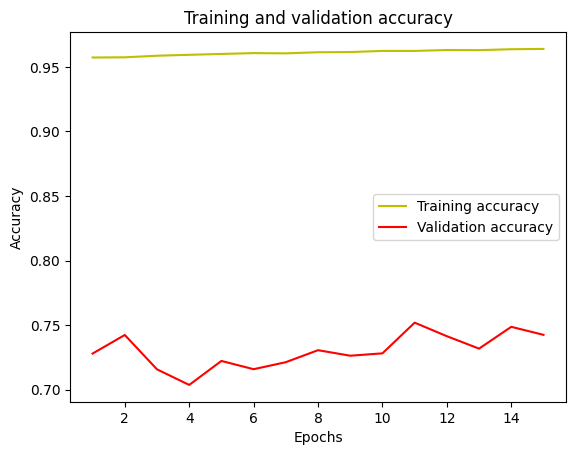

In [30]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

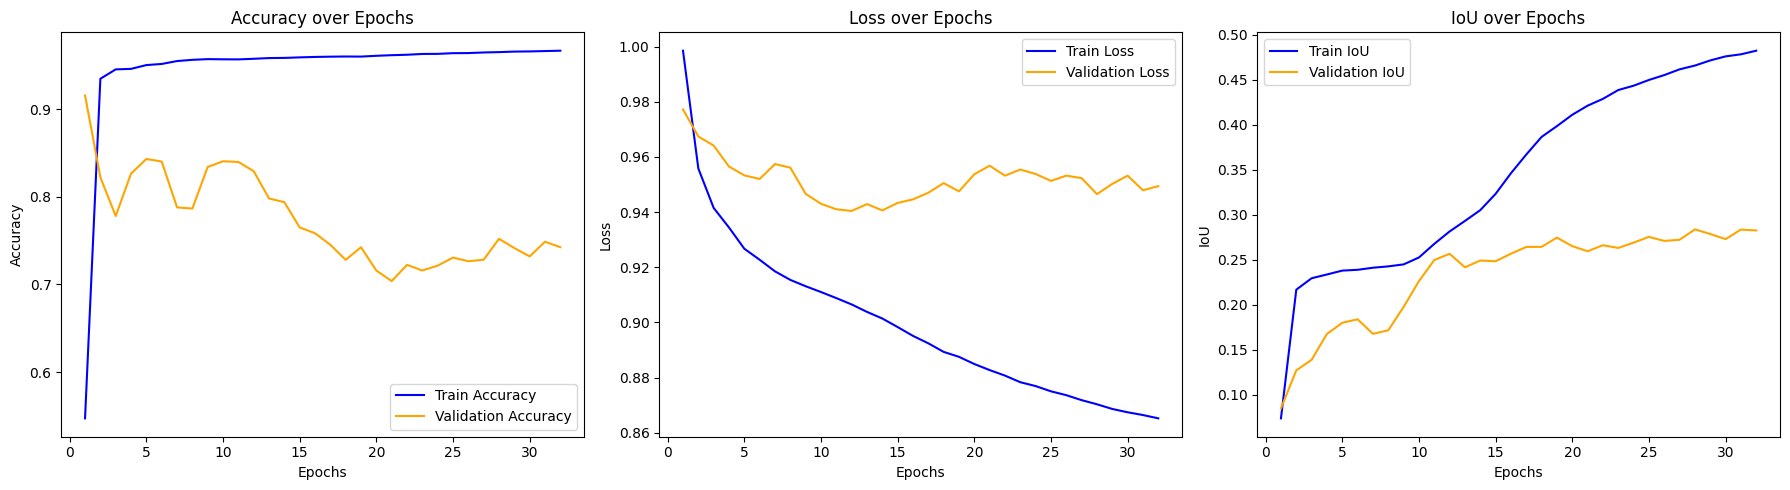

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

iou_score_result = history.history['iou_score']
val_iou = history.history['val_iou_score']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.subplot(1,3,2)
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation IoU
plt.subplot(1,3,3)
plt.plot(epochs, iou_score_result, 'y', label='Training IoU')
plt.plot(epochs, val_iou, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()


plt.tight_layout()
plt.show()

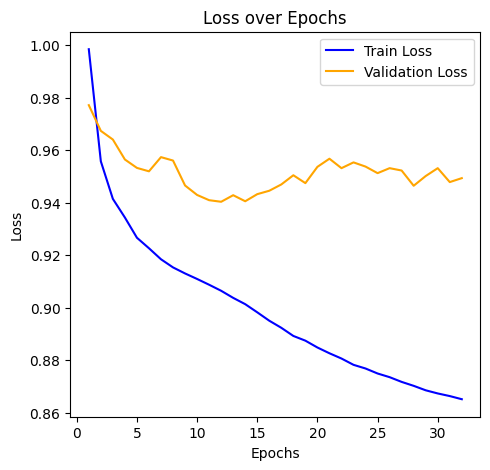

In [39]:
plt.subplot(1,3,1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

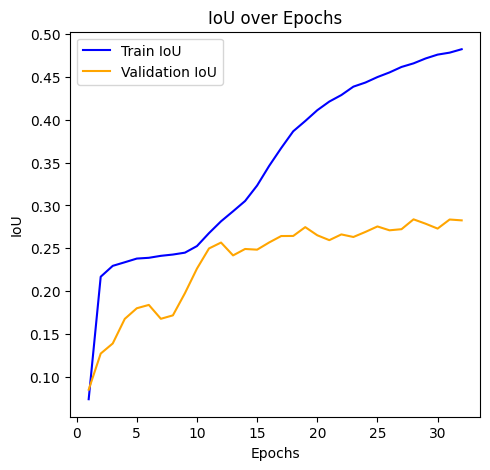

In [43]:

plt.subplot(1,3,3)
plt.plot(epochs, iou_score_result, 'y', label='Training IoU')
plt.plot(epochs, val_iou, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()

In [49]:
from keras.models import load_model

new_model = load_model('C:/Users/deepa/Brain MRI Final Data/brats_3d_attention_unet_30epochs_new.keras', 
                      compile=False)

from keras.metrics import MeanIoU

batch_size=8
test_img_datagen = imageLoader(val_image_path, val_image_list, 
                                val_msk_path, val_msk_list, batch_size)

test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = new_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


img_num = 100

test_img = np.load("C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = new_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Mean IoU = 0.3152734
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


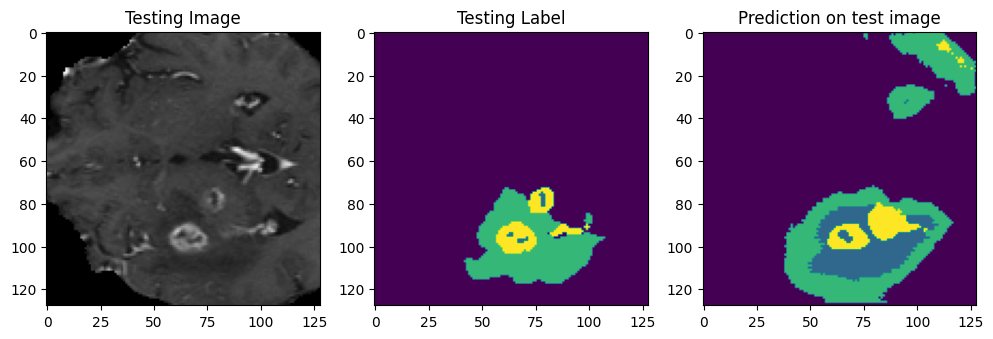

In [50]:
from matplotlib import pyplot as plt
import random

n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

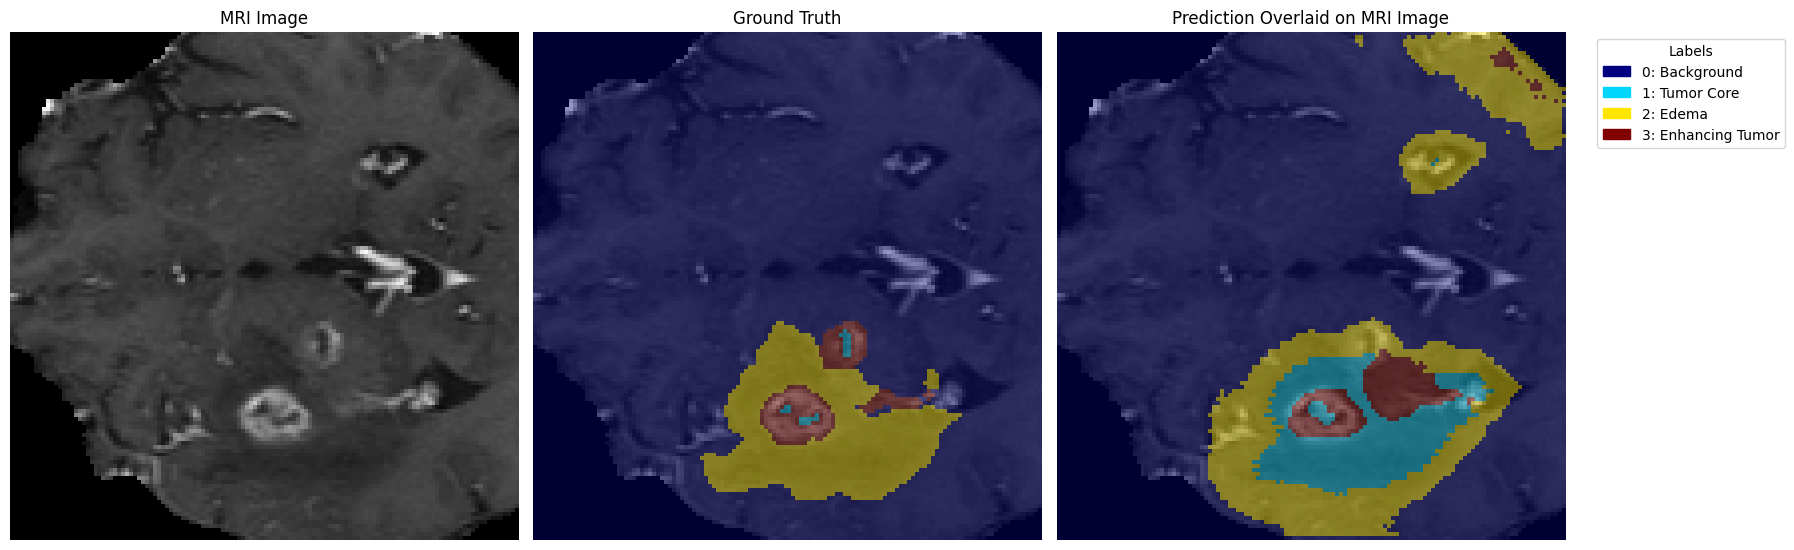

In [53]:
import matplotlib.patches as mpatches


class_labels = {
    0: 'Background',
    1: 'Tumor Core',
    2: 'Edema',
    3: 'Enhancing Tumor'
}

color_map = plt.cm.jet(np.linspace(0, 1, len(class_labels)))

n_slice = 55 


plt.figure(figsize=(18, 6))


plt.subplot(131)
plt.title('MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray') 
plt.axis('off')


plt.subplot(132)
plt.title('Ground Truth')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray') 
plt.imshow(test_mask_argmax[:, :, n_slice], cmap='jet', alpha=0.4)
plt.axis('off')

plt.subplot(133)
plt.title('Prediction Overlaid on MRI Image')
plt.imshow(test_img[:, :, n_slice, 1], cmap='gray') 
plt.imshow(test_prediction_argmax[:, :, n_slice], cmap='jet', alpha=0.4)
plt.axis('off')

legend_patches = [mpatches.Patch(color=color_map[i], label=f"{key}: {label}") 
                  for i, (key, label) in enumerate(class_labels.items())]
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', title="Labels")

plt.tight_layout()
plt.show()

In [29]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model5 = attention_unet_model(128,128,128,3,4)
model5.compile(optimizer= tf.keras.optimizers.Adam(0.00001), loss= total_loss, metrics= metrics)



early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history6 = model5.fit(
   train_img_datagen,
   steps_per_epoch=steps_per_epoch,
   epochs=15,
   verbose=1,
   validation_data=val_img_datagen,
   validation_steps=val_steps_per_epoch,
   callbacks=[early_stopping, reduce_lr]
)

# Save the final model
model5.save('brats_3d_attention_unet_30epochs_2.keras')

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_155 (Conv3D) │ (None, 128, 128,  │      1,312 │ input_layer_5[0]… │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_45          │ (None, 128, 128,  │          0 │ conv3d_155[0][0]  │
│ (Dropout)           │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_156 (Conv3D) │ (None, 128, 128,  │      6,928 │ dropout_45[0][0]  │
│                     │ 128, 16)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_20    │ (None, 64, 64,    │          0 │ conv3d_156[0][0]  │
│ (MaxPooling3D)      │ 64, 16)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_157 (Conv3D) │ (None, 64, 64,    │     13,856 │ max_pooling3d_20… │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_46          │ (None, 64, 64,    │          0 │ conv3d_157[0][0]  │
│ (Dropout)           │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_158 (Conv3D) │ (None, 64, 64,    │     27,680 │ dropout_46[0][0]  │
│                     │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_21    │ (None, 32, 32,    │          0 │ conv3d_158[0][0]  │
│ (MaxPooling3D)      │ 32, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_159 (Conv3D) │ (None, 32, 32,    │     55,360 │ max_pooling3d_21… │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_47          │ (None, 32, 32,    │          0 │ conv3d_159[0][0]  │
│ (Dropout)           │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_160 (Conv3D) │ (None, 32, 32,    │    110,656 │ dropout_47[0][0]  │
│                     │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_22    │ (None, 16, 16,    │          0 │ conv3d_160[0][0]  │
│ (MaxPooling3D)      │ 16, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_161 (Conv3D) │ (None, 16, 16,    │    221,312 │ max_pooling3d_22… │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 16, 16,    │          0 │ conv3d_161[0][0]  │
│ (Dropout)           │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_162 (Conv3D) │ (None, 16, 16,    │    442,496 │ dropout_48[0][0]  │
│                     │ 16, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_23    │ (None, 8, 8, 8,   │          0 │ conv3d_162[0][0]

 Total params: 5,690,072 (21.71 MB)

 Trainable params: 5,690,072 (21.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


c:\Users\deepa\Brain MRI Final Data\brats\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_345']
Received: inputs=Tensor(shape=(None, 128, 128, 128, 3))
  warnings.warn(msg)


129/129 ━━━━━━━━━━━━━━━━━━━━ 694s 5s/step - accuracy: 0.0619 - iou_score: 0.0041 - loss: 1.0227 - val_accuracy: 0.5064 - val_iou_score: 0.0166 - val_loss: 0.9992 - learning_rate: 1.0000e-05
Epoch 2/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 756s 6s/step - accuracy: 0.6792 - iou_score: 0.1322 - loss: 0.9770 - val_accuracy: 0.9305 - val_iou_score: 0.1275 - val_loss: 0.9676 - learning_rate: 1.0000e-05
Epoch 3/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 724s 6s/step - accuracy: 0.9384 - iou_score: 0.2209 - loss: 0.9463 - val_accuracy: 0.8923 - val_iou_score: 0.1239 - val_loss: 0.9693 - learning_rate: 1.0000e-05
Epoch 4/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 698s 5s/step - accuracy: 0.9434 - iou_score: 0.2273 - loss: 0.9406 - val_accuracy: 0.7741 - val_iou_score: 0.1173 - val_loss: 0.9731 - learning_rate: 1.0000e-05
Epoch 5/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 706s 5s/step - accuracy: 0.9447 - iou_score: 0.2341 - loss: 0.9324 - val_accuracy: 0.5762 - val_iou_score: 0.1136 - val_loss: 0.9761 - learning_rate: 1.0000e-05
Epoch 

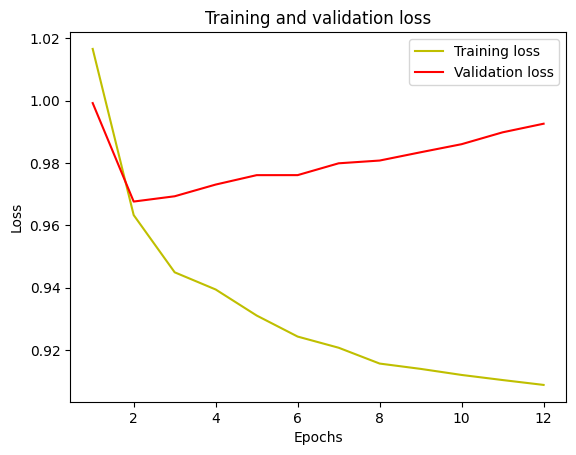

In [30]:
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

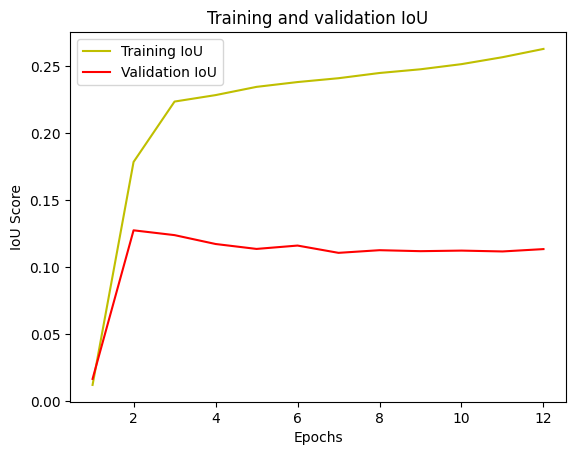

In [31]:
iou_score_result = history6.history['iou_score']
val_iou = history6.history['val_iou_score']
epochs = range(1, len(iou_score_result) + 1)
plt.plot(epochs, iou_score_result, 'y', label='Training IoU')
plt.plot(epochs, val_iou, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()
plt.show()

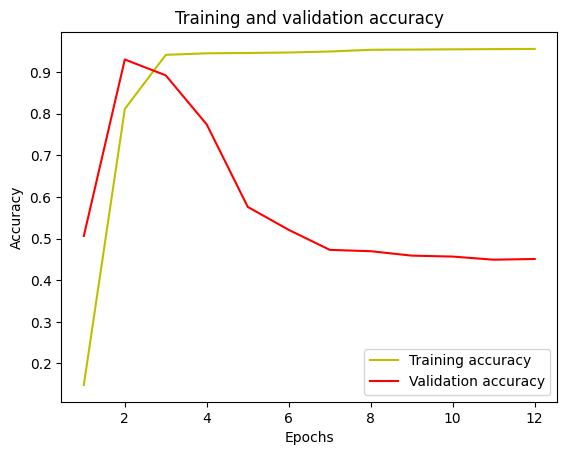

In [32]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

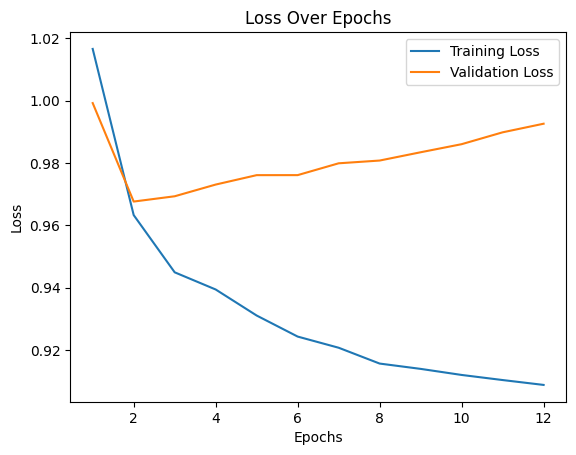

In [36]:
epochs = range(1, len(history6.history['loss']) + 1)
plt.plot(epochs, history6.history['loss'], label='Training Loss')
plt.plot(epochs, history6.history['val_loss'], label='Validation Loss')

# Adding plot details
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()

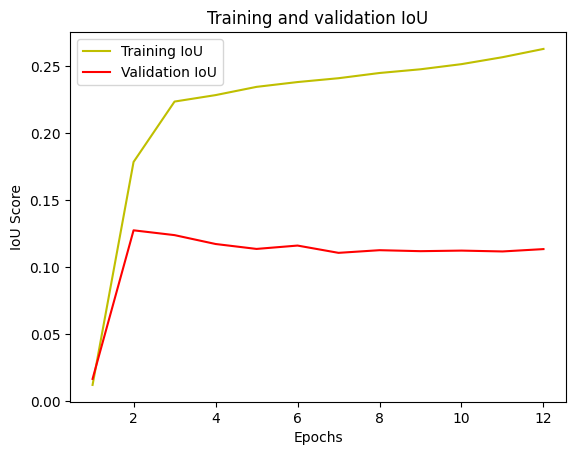

In [40]:
iou_score_result = history6.history['iou_score']
val_iou = history6.history['val_iou_score']
epochs = range(1, len(iou_score_result) + 1)
plt.plot(epochs, iou_score_result, 'y', label='Training IoU')
plt.plot(epochs, val_iou, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU Score')
plt.legend()
plt.show()

In [43]:
img_num = 100

test_img = np.load("C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("C:/Users/deepa/Brain MRI Final Data/BraTS2020_TrainingData/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model5.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

c:\Users\deepa\Brain MRI Final Data\brats\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_345']
Received: inputs=Tensor(shape=(1, 128, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


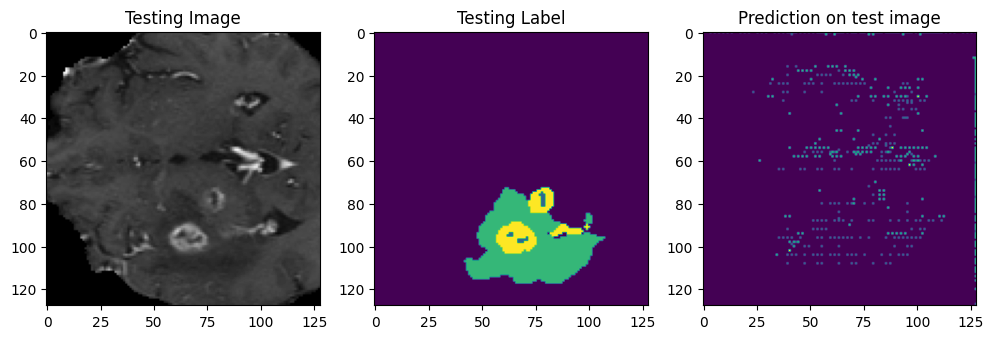

In [47]:
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()